In [151]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [152]:
summoner_name = "야식은치킨이지"
timeline = pd.read_json("data/{name}/timeline.json".format(name=summoner_name))

In [153]:
match_length = len(timeline)
metadata = pd.concat([pd.json_normalize(timeline["metadata"][match_idx]).iloc[:,1:] for match_idx in range(match_length)]).reset_index()

In [154]:
match_index = 1
match_time_length = len(timeline["info"][match_index]["frames"])
events = [timeline["info"][match_index]["frames"][t]["events"] for t in range(match_time_length)]
participantFrames = [timeline["info"][match_index]["frames"][t]["participantFrames"] for t in range(match_time_length)]

In [155]:
[["blue"]*5,["red"]*5]

[['blue', 'blue', 'blue', 'blue', 'blue'], ['red', 'red', 'red', 'red', 'red']]

마지막 골드 총량 [14516 12546  8804 12092 13128 12074 11293 12243 10625  8497]


<AxesSubplot:>

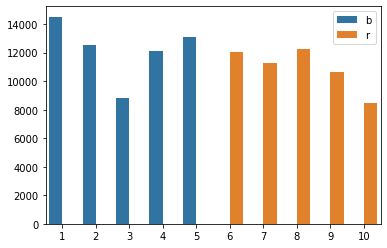

In [156]:
def get_total_gold(t):
    return(np.array([participantFrames[t][str(idx)]["totalGold"] for idx in range(1,11)]))

print("마지막 골드 총량", get_total_gold(match_time_length-1))
sns.barplot(x=np.arange(1,11), y=get_total_gold(match_time_length-1), hue=["b","b","b","b","b","r","r","r","r","r"])

In [157]:
total_gold = pd.DataFrame.from_records([get_total_gold(t) for t in range(match_time_length)])
total_gold_blue, total_gold_red = total_gold.iloc[:,:5], total_gold.iloc[:,5:]
total_gold_blue.head()

,0,1,2,3,4
0,500,500,500,500,500
1,500,500,500,500,500
2,521,590,523,563,621
3,857,868,759,839,1023
4,1099,1133,894,1120,1313


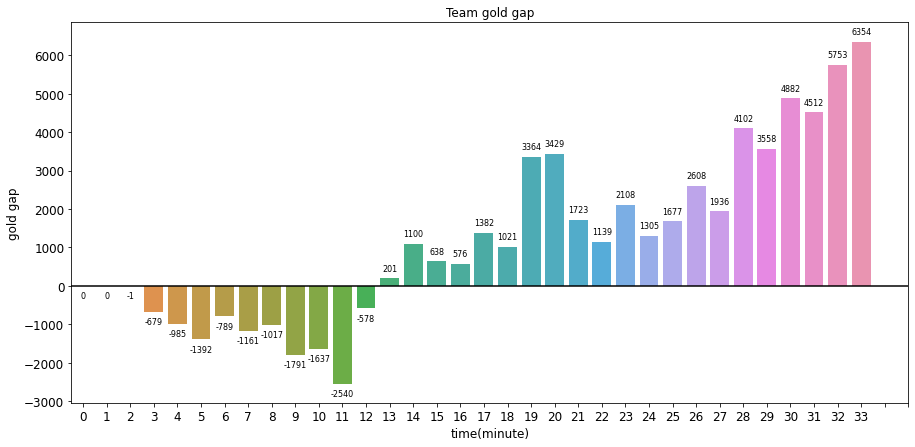

In [289]:
team_total_gold_gap = team_total_gold_blue-team_total_gold_red
# sns.lineplot(x=range(match_time_length), y=team_total_gold_gap)

plt.figure(figsize=(15,7))
plt.title("Team gold gap")
plt.xlabel('time(minute)', fontsize=12)
plt.ylabel('gold gap', fontsize=12)
g = sns.barplot(x=np.arange(match_time_length), y=team_total_gold_blue-team_total_gold_red, label="blue team gold - red team gold")
plt.xticks(np.arange(0, match_time_length+2, step=1), fontsize=12)
plt.yticks(np.arange(-10000, 10000, step=1000), fontsize=12)
plt.ylim(team_total_gold_gap.min()-500, team_total_gold_gap.max()+500)
plt.axhline(y=0, color="k")

for i in range(match_time_length):
    p = g.patches[i]
    g.annotate("%.0f"%p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
        ha='center', va='center', fontsize=8, color='k', xytext=(0, 10 if team_total_gold_gap[i] > 0 else -10), 
        textcoords='offset points')

In [281]:
diff = []
for i in range(1, match_time_length):
    diff.append(team_total_gold_gap[i] - team_total_gold_gap[i-1])
df_diff = pd.DataFrame(diff, columns=["diff"])
df_diff.index = range(1, match_time_length)

idx_largest_desc, idx_largest_asc = df_diff.sort_values(by="diff").index[[0,-1]]     # 가장 큰 차이가 발생한 시점
idx_largest_desc, idx_largest_asc

(21, 19)

In [268]:
for e in events[idx_largest_asc]:
    if e["type"] == "LEVEL_UP": continue
    if e["type"] == "SKILL_LEVEL_UP": continue
    if e["type"] == "WARD_PLACED": continue
    if e["type"] == "ITEM_DESTROYED": continue
    if e["type"] == "ITEM_PURCHASED": continue
    print("type", e["type"])
    display(pd.json_normalize(e))

type CHAMPION_KILL


,bounty,killStreakLength,killerId,timestamp,type,victimDamageDealt,victimDamageReceived,victimId,position.x,position.y
0,300,2,5,1087001,CHAMPION_KILL,"[{'basic': False, 'magicDamage': 73, 'name': '...","[{'basic': True, 'magicDamage': 0, 'name': 'SR...",10,11196,4123


type CHAMPION_KILL


,assistingParticipantIds,bounty,killStreakLength,killerId,timestamp,type,victimDamageDealt,victimDamageReceived,victimId,position.x,position.y
0,[9],300,1,7,1089810,CHAMPION_KILL,"[{'basic': False, 'magicDamage': 0, 'name': 'Z...","[{'basic': False, 'magicDamage': 0, 'name': 'Z...",1,8335,4820


type CHAMPION_KILL


,bounty,killStreakLength,killerId,timestamp,type,victimDamageDealt,victimDamageReceived,victimId,position.x,position.y
0,274,3,5,1093179,CHAMPION_KILL,"[{'basic': False, 'magicDamage': 0, 'name': 'A...","[{'basic': True, 'magicDamage': 0, 'name': 'SR...",8,13786,4018


type CHAMPION_SPECIAL_KILL


,killType,killerId,multiKillLength,timestamp,type,position.x,position.y
0,KILL_MULTI,5,2,1093179,CHAMPION_SPECIAL_KILL,13513,3831


type CHAMPION_KILL


,assistingParticipantIds,bounty,killStreakLength,killerId,timestamp,type,victimDamageDealt,victimDamageReceived,victimId,position.x,position.y
0,"[1, 3]",300,0,2,1103289,CHAMPION_KILL,"[{'basic': False, 'magicDamage': 0, 'name': 'K...","[{'basic': False, 'magicDamage': 95, 'name': '...",7,11748,5981


type WARD_KILL


,killerId,timestamp,type,wardType
0,3,1106660,WARD_KILL,CONTROL_WARD


type CHAMPION_KILL


,bounty,killStreakLength,killerId,timestamp,type,victimDamageDealt,victimDamageReceived,victimId,position.x,position.y
0,300,4,5,1107716,CHAMPION_KILL,"[{'basic': False, 'magicDamage': 0, 'name': 'Z...","[{'basic': False, 'magicDamage': 0, 'name': 'M...",9,13345,5172


type BUILDING_KILL


,buildingType,killerId,laneType,teamId,timestamp,towerType,type,position.x,position.y
0,TOWER_BUILDING,5,BOT_LANE,200,1113861,OUTER_TURRET,BUILDING_KILL,13866,4505


type BUILDING_KILL


,buildingType,killerId,laneType,teamId,timestamp,towerType,type,position.x,position.y
0,TOWER_BUILDING,2,MID_LANE,200,1136763,OUTER_TURRET,BUILDING_KILL,8955,8510


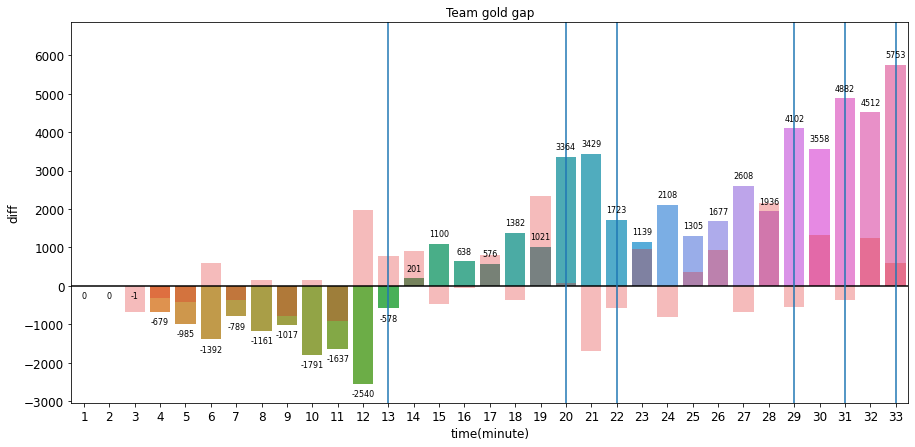

In [297]:
plt.figure(figsize=(15,7))
plt.title("Team gold gap")
plt.xlabel('time(minute)', fontsize=12)
plt.ylabel('gold gap', fontsize=12)
g = sns.barplot(x=np.arange(match_time_length), y=team_total_gold_blue-team_total_gold_red, label="blue team gold - red team gold")
plt.xticks(np.arange(0, match_time_length+2, step=1), fontsize=12)
plt.yticks(np.arange(-10000, 10000, step=1000), fontsize=12)
plt.ylim(team_total_gold_gap.min()-500, team_total_gold_gap.max()+500)
plt.axhline(y=0, color="k")

for i in range(match_time_length):
    p = g.patches[i]
    g.annotate("%.0f"%p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
        ha='center', va='center', fontsize=8, color='k', xytext=(0, 10 if team_total_gold_gap[i] > 0 else -10), 
        textcoords='offset points')

sns.barplot(data=df_diff, x=np.arange(1,match_time_length), y="diff", color="r", alpha=0.3)
for i in df_diff[abs(df_diff["diff"]) >= 1000].index:   # 1000골드 이상의 차이가 발생했을 때를 표시
    plt.axvline(x=i)